In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
import pandas as pd

%matplotlib inline

In [6]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
digits.data[0] ## This column tells the numeric image in matrix form

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

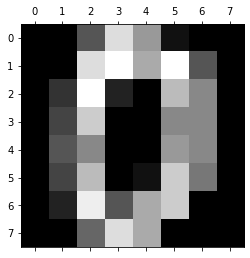

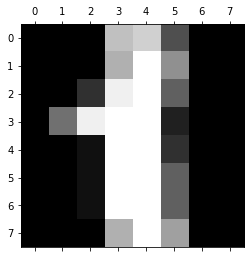

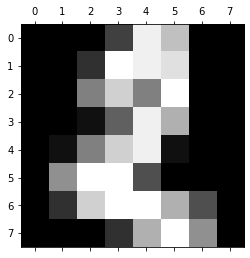

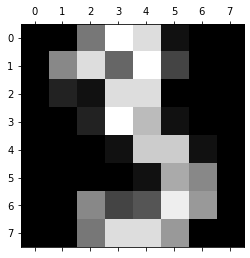

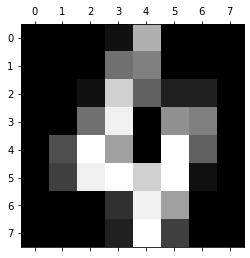

In [12]:
for i in range(0,5):
    plt.matshow(digits.images[i]) ##This key indicates the numeric image
plt.gray()

In [15]:
digits.target[0:20] ###This key indicates to the respective numeric number

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
digits.target_names[0:20] ## This key contains all the digits in maths

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size = 0.2)

In [19]:
len(X_train)

1437

In [20]:
len(X_test)

360

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.score(X_test,y_test)

0.9638888888888889

In [23]:
model.score(X_train,y_train)

1.0

#### Our Model is perfectly trained and the testing accuracy is also quite good.

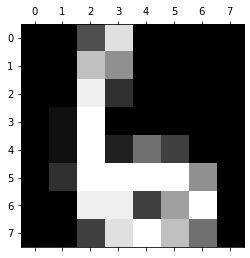

In [25]:
plt.matshow(digits.images[67])

In [28]:
model.predict([digits.data[67]])[0]

6

## Confusion Matrix for where our model showed wrong prediction

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[34,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  1,  0,  1,  0],
       [ 0,  1,  0,  1,  0, 36,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26]], dtype=int64)

Text(33.0, 0.5, 'Predicted')

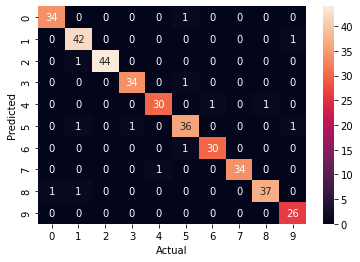

In [35]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')